In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from ipywidgets import interact, IntSlider
import warnings

warnings.filterwarnings("ignore")

In [24]:
data = pd.read_csv("nigeria_houses_data.csv")

In [25]:
data.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


# Exploratory Data Analysis


In [27]:
data['title'].unique()

array(['Detached Duplex', 'Terraced Duplexes', 'Semi Detached Duplex',
       'Detached Bungalow', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow'], dtype=object)

In [28]:
data['state'].unique()

array(['Abuja', 'Lagos', 'Edo', 'Ogun', 'Oyo', 'Imo', 'Anambara',
       'Rivers', 'Enugu', 'Kaduna', 'Kwara', 'Nasarawa', 'Abia', 'Delta',
       'Akwa Ibom', 'Osun', 'Ekiti', 'Cross River', 'Kogi', 'Plateau',
       'Kano', 'Katsina', 'Bayelsa', 'Borno', 'Niger'], dtype=object)

<Axes: xlabel='state'>

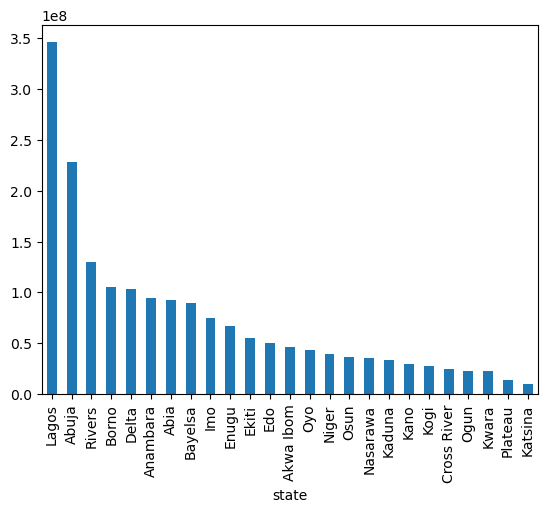

In [30]:
data.groupby('state')['price'].mean().sort_values(ascending=False).plot(kind='bar')

Lagos seems to be off the league of other states and this information may possibly be because of outliers

<Axes: xlabel='town'>

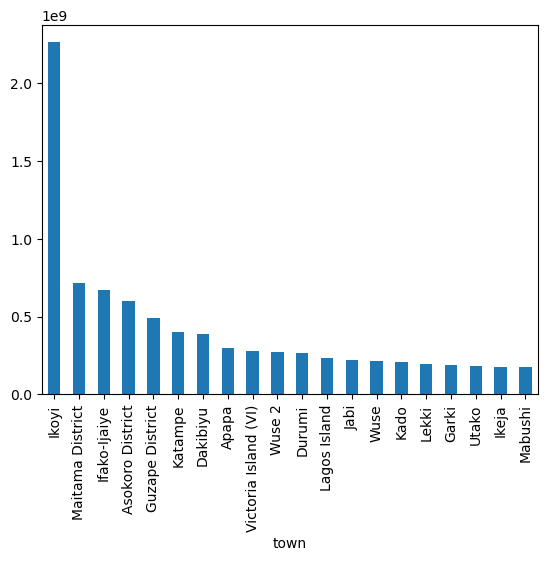

In [32]:
data.groupby('town')['price'].mean().sort_values(ascending = False).head(20).plot(kind = 'bar')

Just a confirmation of the previous plot, Ikoyi is probably the most expensive area in Lagos and that is causing the outliers, lets futher confirm this

In [35]:
# Detecting suspected outlier
print("________________Ikoyi_______________")
print(data[data['town']=='Ikoyi'].max())
print("______________Ifako-Ijaiye_____________")
print(data[data['town']=='Ifako-Ijaiye'].max())
print("______________Ikeja___________________")
print(data[data['town']=='Ikeja'].max())

________________Ikoyi_______________
bedrooms                       9.0
bathrooms                      9.0
toilets                        9.0
parking_space                  9.0
title            Terraced Duplexes
town                         Ikoyi
state                        Lagos
price              1800000000000.0
dtype: object
______________Ifako-Ijaiye_____________
bedrooms                       7.0
bathrooms                      8.0
toilets                        8.0
parking_space                  8.0
title            Terraced Bungalow
town                  Ifako-Ijaiye
state                        Lagos
price                55000000000.0
dtype: object
______________Ikeja___________________
bedrooms                       9.0
bathrooms                      9.0
toilets                        9.0
parking_space                  9.0
title            Terraced Duplexes
town                         Ikeja
state                        Lagos
price                 1440000000.0
dtype: object


In [38]:
trimmed_data = q1, q9 = data["price"].quantile([0.15, 0.85])
mask_data = data["price"].between(q1, q9)
trimmed_data = data[mask_data]
trimmed_data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0
...,...,...,...,...,...,...,...,...
24318,4.0,5.0,5.0,4.0,Semi Detached Duplex,Lekki,Lagos,110000000.0
24320,3.0,4.0,4.0,5.0,Detached Duplex,Lekki,Lagos,80000000.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [39]:
trimmed_data['town'].unique()

array(['Lekki', 'Ajah', 'Oredo', 'Lokogoma District',
       'Victoria Island (VI)', 'Katampe', 'Magodo', 'Kaura', 'Galadimawa',
       'Gwarinpa', 'Yaba', 'Agege', 'Jahi', 'Orozo', 'Owerri North',
       'Ikeja', 'Idu Industrial', 'Owerri Municipal', 'Isheri North',
       'Utako', 'Guzape District', 'Port Harcourt', 'Isheri', 'Ibadan',
       'Ikoyi', 'Life Camp', 'Dape', 'Ejigbo', 'Isolo', 'Gaduwa', 'Dakwo',
       'Asokoro District', 'Chikun', 'Ojodu', 'Lugbe District', 'Wuye',
       'Kubwa', 'Shomolu', 'Ogudu', 'Owerri West', 'Sango Ota',
       'Surulere', 'Obio-Akpor', 'Enugu', 'Apo', 'Ibeju Lekki', 'Wuse 2',
       'Mowe Town', 'Durumi', 'Simawa', 'Arepo', 'Mabushi', 'Alimosho',
       'Maryland', 'Karsana', 'Wuse', 'Karmo', 'Ifo', 'Gbagada', 'Idimu',
       'Maitama District', 'Gudu', 'Ikotun', 'Kukwaba', 'Mbora (Nbora)',
       'Jabi', 'Ikorodu', 'Kaduna South', 'Asaba', 'Uyo', 'Kosofe',
       'Ibafo', 'Ilupeju', 'Afijio', 'Ifako-Ijaiye', 'Ado-Ekiti', 'Ipaja',
       'Oluyo

In [40]:
records = trimmed_data['state'].value_counts()
records

state
Lagos        13805
Abuja         2462
Rivers         339
Oyo            229
Imo            195
Ogun           141
Enugu           96
Anambara        83
Edo             51
Delta           42
Akwa Ibom       13
Kaduna           8
Ekiti            5
Abia             5
Kogi             4
Nasarawa         4
Osun             3
Kwara            2
Borno            2
Bayelsa          1
Niger            1
Name: count, dtype: int64

In [48]:
# remove the states with few entries
trimmed_data = trimmed_data[~trimmed_data['state'].isin(records[records< 100].index)]

In [42]:
trimmed_data['state'].value_counts()

state
Lagos     13805
Abuja      2462
Rivers      339
Oyo         229
Imo         195
Ogun        141
Name: count, dtype: int64

so we ended up reducing the entries of the dataset

<Axes: title={'center': 'Most Expensive towns in Nigeria'}, xlabel='town'>

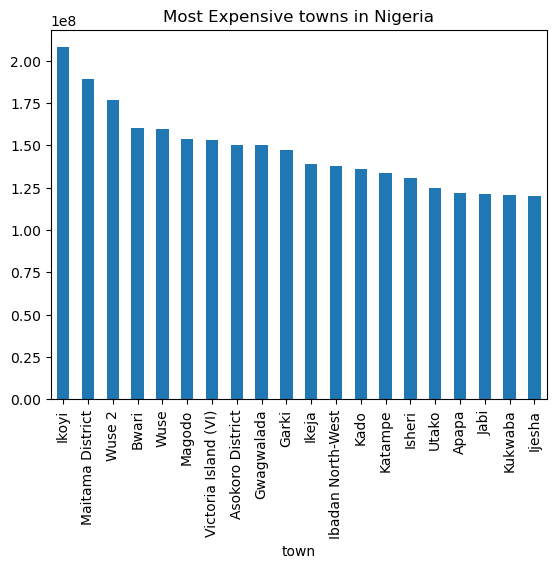

In [43]:
# checking the chart again
trimmed_data.groupby('town')['price'].mean().sort_values(ascending =False).head(20).plot(kind='bar', title ='Most Expensive towns in Nigeria')

As you can see, the average looksmore stabilized

In [45]:
trimmed_data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0
...,...,...,...,...,...,...,...,...
24318,4.0,5.0,5.0,4.0,Semi Detached Duplex,Lekki,Lagos,110000000.0
24320,3.0,4.0,4.0,5.0,Detached Duplex,Lekki,Lagos,80000000.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0


Feature Engineering

In [51]:
trimmed_data['total_rooms'] = trimmed_data['bedrooms'] + trimmed_data['bathrooms'] + trimmed_data['toilets'] + trimmed_data['parking_space']

In [52]:
trimmed_data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,18.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,19.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,15.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0,18.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0,4.0
...,...,...,...,...,...,...,...,...,...
24318,4.0,5.0,5.0,4.0,Semi Detached Duplex,Lekki,Lagos,110000000.0,18.0
24320,3.0,4.0,4.0,5.0,Detached Duplex,Lekki,Lagos,80000000.0,16.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0,18.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0,14.0


In [58]:
'''
corr = trimmed_data.corr()
sns.heatmap(corr, annot=True)
'''

'\ncorr = trimmed_data.corr()\nsns.heatmap(corr, annot=True)\n'

In [59]:
trimmed_data.drop(columns=['parking_space', 'title', 'town', 'state'], inplace = True)

In [61]:
# removing outliers
trim = q1, q9 = trimmed_data['price'].quantile([0.1, 0.9])
mask = trimmed_data['price'].between(q1, q9)
trimmed_data = trimmed_data[mask]

In [62]:
trimmed_data

,bedrooms,bathrooms,toilets,price,total_rooms
2,4.0,5.0,5.0,120000000.0,18.0
4,4.0,4.0,5.0,75000000.0,15.0
6,4.0,5.0,5.0,65000000.0,18.0
9,4.0,4.0,5.0,60000000.0,18.0
12,4.0,5.0,6.0,65000000.0,18.0
...,...,...,...,...,...
24318,4.0,5.0,5.0,110000000.0,18.0
24320,3.0,4.0,4.0,80000000.0,16.0
24323,4.0,5.0,5.0,68000000.0,18.0
24324,3.0,4.0,4.0,78000000.0,14.0


In [63]:
trimmed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14178 entries, 2 to 24325
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     14178 non-null  float64
 1   bathrooms    14178 non-null  float64
 2   toilets      14178 non-null  float64
 3   price        14178 non-null  float64
 4   total_rooms  14178 non-null  float64
dtypes: float64(5)
memory usage: 664.6 KB


# Model Building and Selection

In [64]:
X = trimmed_data.drop('price', axis = 1)
y= trimmed_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [68]:
models = {
    'Linear Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNN Regression': KNeighborsRegressor() 
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: ")
    print(f" Mean Sqaured Error:{mse:4f}")
    print(f" R2 Score: {r2:.4f}")

Linear Regression: 
 Mean Sqaured Error:1174371154239986.000000
 R2 Score: 0.1415
Lasso Regression: 
 Mean Sqaured Error:1174364965678561.750000
 R2 Score: 0.1415
Elastic Net Regression: 
 Mean Sqaured Error:1196502860888261.500000
 R2 Score: 0.1253
Decision Tree Regression: 
 Mean Sqaured Error:1125601435383631.125000
 R2 Score: 0.1772
Random Forest Regression: 
 Mean Sqaured Error:1104047668424270.750000
 R2 Score: 0.1929
Gradient Boosting Regression: 
 Mean Sqaured Error:1069345597769342.250000
 R2 Score: 0.2183
SVR: 
 Mean Sqaured Error:1479372524500508.500000
 R2 Score: -0.0814
KNN Regression: 
 Mean Sqaured Error:1224806535652709.000000
 R2 Score: 0.1046


In [71]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)
print("Mean price:", y_mean)
print('Baseline MSE:',  mean_squared_error(y_train, y_pred_baseline))

Mean price: 94950130.76697232
Baseline MSE: 1342225635426989.5


The best model here is Gradient Boosting Regressor which has the lowest MSE, this means that is making prediction that are closer to the actual values on the average compared to other models, and it has the highest R2 score which means that it isexplaining the varience in the data better than other models

# Hyperparameter Tuning

GridSearchCV

In [74]:
gbr = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [150, 100, 200],
    'learning_rate': [0.1, 0.2,0.3],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}
grid_search = GridSearchCV(estimator = gbr, param_grid = param_grid, cv =5, n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [150, 100, 200]})

In [87]:
best_params_randCV = grid_search.best_params_
print("Best Hyperparameters:", best_params_randCV)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}


In [88]:
best_grid = grid_search.best_estimator_
best_grid

GradientBoostingRegressor(max_depth=4, min_samples_leaf=3, min_samples_split=3)

In [90]:
y_pred = best_grid.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f" Mean Sqaured Error: {mse:.4f}")
print(f" R2 Score: {r2:.4f}")

 Mean Sqaured Error: 1075092093420460.2500
 R2 Score: 0.2141


RandomSearchCV

In [91]:
param_distributions = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2']
    # Add other hyperparameters to explore
}

random_search = RandomizedSearchCV(gbr, param_distributions, n_iter=100, cv = 5, n_jobs = -1)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]})

In [92]:
best_params_randCV = random_search.best_params_
print("Best Hyperparameters:", best_params_randCV)

Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.01}


In [93]:
best_grid_randCV = random_search.best_estimator_
best_grid_randCV

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, max_features='log2',
                          min_samples_leaf=2, n_estimators=300, subsample=0.8)

In [94]:
y_pred = best_grid_randCV.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"  Mean Squared Error: {mse:.4f}")
print(f"  R2 Score: {r2:.4f}")

  Mean Squared Error: 1071172911187051.0000
  R2 Score: 0.2170




We will be going with the RandomSearch Parameters, its kind of tricky the BaseLine model sets the standard and all the models did well, but GradientBoostRegressor was the best and then tuning the hyperparameters a little bit

It seems as thought the hyperparameters gave us a little higher MSE and a little lower r2score, just to avoid overfitting it would be accepted


In [95]:
# testing the model

def make_prediction(bedrooms, bathrooms, toilets, total_rooms):

    data = {"bedrooms":bedrooms,
            "bathrooms":bathrooms,
            "toilets":toilets,
            "total_rooms":total_rooms
    }
    
    df = pd.DataFrame(data, index=[0])
    prediction = best_grid_randCV.predict(df)
    return f"Predicted apartment price: ₦{prediction}"

In [96]:
# testing 
make_prediction(bedrooms = 3, bathrooms = 4,toilets = 6, total_rooms = 16)

'Predicted apartment price: ₦[74633452.07828332]'